In [125]:
import optuna
import plotly.io as pio
from optuna.trial import TrialState
import matplotlib.pyplot as plt
from optuna.importance import get_param_importances

# Load the study
study = optuna.load_study(study_name="nn_control_alloc", storage="sqlite:///../optuna_studies/nn_control_alloc_v6_smooth.db")
plots_save_path = '../optuna_studies/plots/'

#RENAME - TEMPORARIO
# Define the mapping of old to new (shorter) names
rename_map = {
    "optimizer_learning_rate": "opt_LR",
    'leakyReLU_negative_slope': 'LReLU_nslope'
}

renamed_trials = []
for trial in study.trials:
    if trial.number == 0:
        continue

    if trial.state != optuna.trial.TrialState.COMPLETE:
        continue

    # Rename params
    new_params = {rename_map.get(k, k): v for k, v in trial.params.items()}

    # Rename distributions to match renamed params
    new_distributions = {
        rename_map.get(k, k): v for k, v in trial.distributions.items()
    }

    # Create the new trial
    new_trial = optuna.trial.create_trial(
        params=new_params,
        distributions=new_distributions,
        value=trial.value,
        intermediate_values=trial.intermediate_values,
        user_attrs=trial.user_attrs,
        system_attrs=trial.system_attrs,
        state=trial.state
    )
    renamed_trials.append(new_trial)

# Create a new study and add renamed trials
renamed_study = optuna.create_study(direction=study.direction)
renamed_study.add_trials(renamed_trials)
study = renamed_study

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print('Study statistics:')
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2025-06-19 17:17:10,004] A new study created in memory with name: no-name-9563a014-2d7e-4348-a18c-38b342206843


Study statistics:
  Number of finished trials:  29
  Number of pruned trials:  0
  Number of complete trials:  29
Best trial:
  Value:  0.08328076001344711
  Params: 
    n_layers: 4
    LReLU_nslope: 0.08473559984569866
    n_units_l0: 665
    n_units_l1: 507
    n_units_l2: 1104
    n_units_l3: 1953
    optimizer: RMSprop
    opt_LR: 0.00010277806356991367
    l2_lambda: 5.9126412923258794e-05


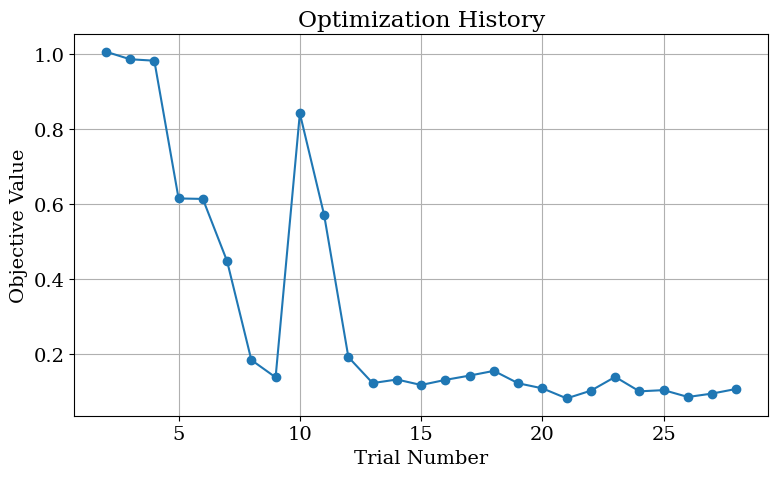

In [126]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
# Get all finished trials
finished_trials = [trial for trial in study.trials if trial.state == optuna.trial.TrialState.COMPLETE]

# Extract trial numbers and objective values
trial_numbers = [trial.number for trial in finished_trials]
objective_values = [trial.value for trial in finished_trials]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(trial_numbers[2:], objective_values[2:], marker='o', linestyle='-')
plt.xlabel("Trial Number")
plt.ylabel("Objective Value")
plt.title("Optimization History")
plt.grid(True)
plt.tight_layout()
plt.savefig('optuna_obj_x_trial.pdf')
plt.show()

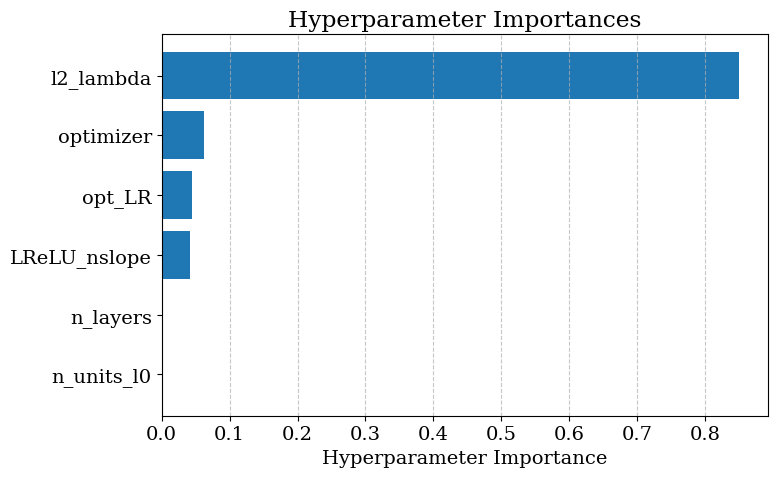

In [127]:
# Get hyperparameter importances
importances = get_param_importances(study)

# Extract names and scores
param_names = list(importances.keys())
importance_values = list(importances.values())

# Plot as bar chart
plt.figure(figsize=(8, 5))
plt.barh(param_names, importance_values)
plt.xlabel("Hyperparameter Importance")
plt.title("Hyperparameter Importances")
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('hyperperameter_importance.pdf')
plt.show()

In [128]:
# Visualizations
fig1 = optuna.visualization.plot_optimization_history(study)
fig2 = optuna.visualization.plot_parallel_coordinate(study)
fig3 = optuna.visualization.plot_param_importances(study)
fig4 = optuna.visualization.plot_slice(study)
fig5 = optuna.visualization.plot_contour(study)

In [129]:
# Display interactively
fig1.show()
fig1.write_image(plots_save_path + 'opt-history.pdf')

In [130]:
fig2.show()

In [131]:
fig3.show()
fig3.write_image(plots_save_path + 'param-importances.pdf')


In [132]:
fig4.show()

In [133]:

# Improve layout: increase size, spacing, font
fig5.update_layout(
    width=1200,
    height=1200,
    font=dict(size=14),
    margin=dict(l=60, r=60, t=60, b=60),
)

# Optional: Rotate axis labels if overlapping
fig5.update_xaxes(tickangle=45)

# Rotate x-axis and y-axis labels for clarity
#for axis in fig5.layout:
#    if isinstance(fig5.layout[axis], dict) and "tickangle" in fig5.layout[axis]:
#        fig5.layout[axis]["tickangle"] = 45

fig5.update_xaxes(tickangle=45)
fig5.update_yaxes(tickangle=0)

# Show the cleaned-up plot
fig5.show()

In [134]:
dpi = 300
aspect_ratio=0.7
single_column_width_px = single_column_width_inches * dpi
subplot_height_px = single_column_width_px * aspect_ratio

NameError: name 'single_column_width_inches' is not defined

In [ ]:
print(f"Number of trials: {len(study.trials)}")

completed = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]
print(f"Completed trials: {len(completed)}")

Number of trials: 31
Completed trials: 31


In [ ]:
filtered_trials = [t for t in study.trials if t.params.get("n_layers") == 2]
sub_study = optuna.create_study()
sub_study.add_trials(filtered_trials)
fig = optuna.visualization.plot_parallel_coordinate(sub_study)
fig.show()


[I 2025-05-14 10:49:42,251] A new study created in memory with name: no-name-d2c1165e-c0f2-44a7-94a6-a8e4267640eb


In [ ]:
fig.update_traces(line=dict(colorscale="Viridis"))  # Other options: "Inferno", "Cividis", "Bluered", etc.
fig.show()
fig.write_image(plots_save_path + 'coord-plot.pdf')


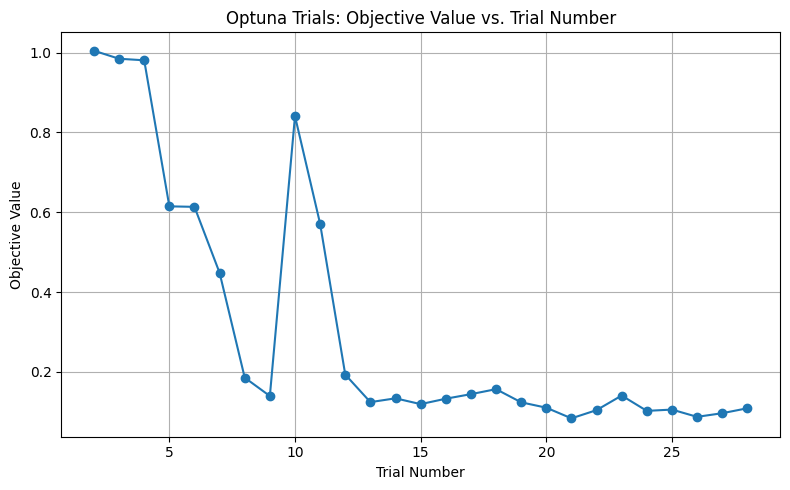